# **2.1 Team Members**

Divya Jacob  
Nandhini Dhanasekaran

# **2.2 Problem Formulation/Introduction**
### 2.2.1 Introduction

Imagine the majesty and the iceberg that marked the "Titanic's" fate. A journey that began with 2,224 passengers, of whom 722 managed to survive and 1,502 ventured into the frigid depths as there were insufficient lifeboats to accommodate everyone onboard. The tales of tragedy and resiliency on that tragic night are revealed by the Titanic dataset from Kaggle. Come along on this data voyage with us as we explore the statistics and stories that show who survived the harsh seas and who perished based on some passenger informations such as their age, gender, socioeconomic status and so on. "Are you prepared to navigate the Titanic's data voyage?"

**Problem Statement**:  Create a prediction model that can predit if a passenger will survive or not based on their age, gender, socioeconomic status etc.

### 2.2.2 Data Population

The population includes all the passengers who were present on the Titanic during the time the ship sank.

# **2.3 Data**

### 2.3.1 Kaggle Account
https://www.kaggle.com/divyajacob123

### 2.3.2 Data loading and description

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/BigData/Project'

/content/drive/MyDrive/BigData/Project


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# List all files under the input directory

import os
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/train.csv
./data/gender_submission.csv
./data/test.csv


In [4]:
train_file='./data/train.csv'
print(train_file, "======================\n")
with open(train_file, "r") as f:
    for i in range(5):
        print(i, "\t", repr(f.readline()))

./data/train.csv ======================

0 	 'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n'
1 	 '1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n'
2 	 '2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n'
3 	 '3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n'
4 	 '4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\n'


In [5]:
test_file='./data/test.csv'
print(test_file, "======================\n")
with open(test_file, "r") as f:
    for i in range(5):
        print(i, "\t", repr(f.readline()))

./data/test.csv ======================

0 	 'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n'
1 	 '892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\n'
2 	 '893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\n'
3 	 '894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\n'
4 	 '895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\n'


In [6]:
gender_file='./data/gender_submission.csv'
print(gender_file, "======================\n")
with open(gender_file, "r") as f:
    for i in range(5):
        print(i, "\t", repr(f.readline()))

./data/gender_submission.csv ======================

0 	 'PassengerId,Survived\n'
1 	 '892,0\n'
2 	 '893,1\n'
3 	 '894,0\n'
4 	 '895,0\n'


train.csv consists of training data.
Each row includes information about passenger such as the passengerid, whether the passenger survived or not, the class in which they travelled, age, name and so on.

test.csv consists of test data. It includes the same fields as Train.csv with the difference being that it does not have the column Survived which has the information as to whether the passenger survived or not.

gender_submission.csv consists of a sample result format to be used for submission. It contains only the passenger id and whether the passenger survived or not.

### 2.3.3 Data Wrangling

In [7]:
# Load the training dataset into pandas
traindata = pd.read_csv('./data/train.csv')

# Obtaining the summary of dataframe's structure and content
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Get statistical info about the data
traindata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Randomly selecting 10 rows from the dataframe
traindata.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
285,286,0,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,NaN,C
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
89,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S


The training dataset consists of 12 columns  
**PassengerId**: A unique identifier for each passenger on the Titanic  
**Survived**: 1 indicates that the passenger survived and 0 indicates that they died  
**Pclass**: The class in which the passenger was travelling in(1st, 2nd or 3rd)  
**Name**: The full name of the passenger  
**Age**: Age of the passenger   
**Sibsp**: Number of siblings / spouses aboard the Titanic  
**Parch**: Number of parents / children aboard the Titanic  
**Ticket**: Ticket number  
**Fare**: Cost of ticket    
**Cabin**: Cabin Number  
**Embarked**: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  


In [10]:
# Load the test dataset into pandas
testdata = pd.read_csv('./data/test.csv')

# Obtaining the summary of dataframe's structure and content
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
# Get statistical info about the data
testdata.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
# Randomly selecting 10 rows from the dataframe testdata
testdata.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
237,1129,3,"Baccos, Mr. Raffull",male,20.00,0,0,2679,7.2250,NaN,C
202,1094,1,"Astor, Col. John Jacob",male,47.00,1,0,PC 17757,227.5250,C62 C64,C
73,965,1,"Ovies y Rodriguez, Mr. Servando",male,28.50,0,0,PC 17562,27.7208,D43,C
126,1018,3,"Brobeck, Mr. Karl Rudolf",male,22.00,0,0,350045,7.7958,NaN,S
403,1295,1,"Carrau, Mr. Jose Pedro",male,17.00,0,0,113059,47.1000,NaN,S
191,1083,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S
182,1074,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18.00,1,0,113773,53.1000,D30,S
113,1005,3,"Buckley, Miss. Katherine",female,18.50,0,0,329944,7.2833,NaN,Q
57,949,3,"Abelseth, Mr. Olaus Jorgensen",male,25.00,0,0,348122,7.6500,F G63,S
250,1142,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S


 **Structure**

The dataset is structured in a tabular format with rows representing individual passengers and columns representing various attributes such as passenger class, age, sex, and fare.

There are a total of 891 rows and 12 columns in the training dataset.

In [13]:
# Retrieve the dimensions of the dataframe traindata
traindata.shape

(891, 12)

There are a total of 418 rows and 11 columns in the test dataset.

In [14]:
# Retrieve the dimensions of the dataframe testdata
testdata.shape

(418, 11)

In [15]:
print(train_file, "is", os.path.getsize(train_file) / 1e6, "MB")

./data/train.csv is 0.061194 MB


In [16]:
with open(train_file, "r") as f:
    print(train_file, "is", sum(1 for l in f), "lines.")

./data/train.csv is 892 lines.


The file with the training data is comparatively small and the file name shows that it is in csv format. The file has 892 lines in it.

 **Granularity**

The granularity of the dataset is at the passenger level. Each row represents a single passenger and their corresponding attributes.

Grouping the passengers

In [17]:
traindata.groupby('PassengerId').nunique()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,0,1
2,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,0,1
4,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,1,1,1,1,1,1,1,1,1,0,1
888,1,1,1,1,1,1,1,1,1,1,1
889,1,1,1,1,0,1,1,1,1,0,1


In [18]:
testdata.groupby('PassengerId').nunique()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,1,1,1,1,1,1,1,1,0,1
893,1,1,1,1,1,1,1,1,0,1
894,1,1,1,1,1,1,1,1,0,1
895,1,1,1,1,1,1,1,1,0,1
896,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1305,1,1,1,0,1,1,1,1,0,1
1306,1,1,1,1,1,1,1,1,1,1
1307,1,1,1,1,1,1,1,1,0,1


Due to the fact that even after grouping and making each row unique, the number of rows remained the same as before, the findings above indicate that passengerId is the unique key for each row. It follows that each row contains information about a single passenger. Consequently, the granularity is observed from the data.

 **Scope**

 The scope of the dataset is limited to passengers aboard the Titanic. It does not include any information about crew members or other individuals who were not passengers on the ship. We are also given information of 891 passengers in the training dataset and 418 passengers in the test dataset, for a total of 1309 out of the 1317 passengers who were on the ship so we have data about about almost all the passengers onboard.


Text(0.5, 1.0, 'Relationship between Sex and Number of passengers survived')

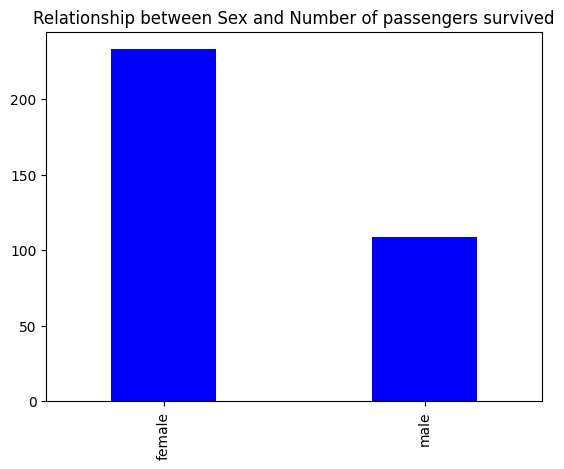

In [19]:
# Filtering to select passengers who survived
survived_passengers = traindata[traindata["Survived"] == 1]

# Counting the number of survivors by gender
survived_by_gender = survived_passengers["Sex"].value_counts()

# Plot the results
survived_by_gender.plot(kind="bar",x= 'Number of passengers survived',y='Gender of passenger',color='blue', width=0.4)
plt.title('Relationship between Sex and Number of passengers survived')

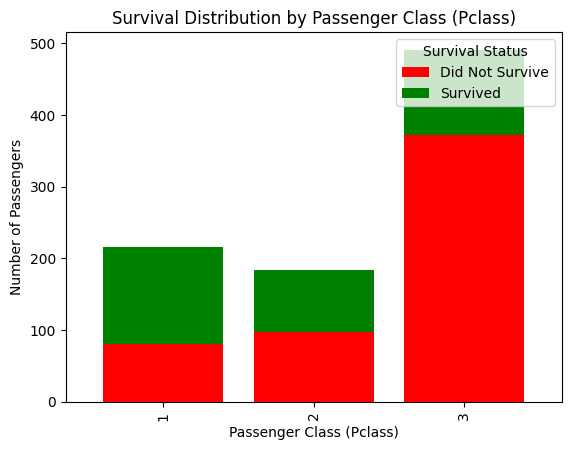

In [20]:
# Group the data by 'Pclass' and 'Survived' and count the occurrences
class_survival_counts = traindata.groupby(['Pclass', 'Survived']).size().unstack().fillna(0)

# Create a stacked bar chart
class_survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'], width=0.8)

# Title and labels
plt.title('Survival Distribution by Passenger Class (Pclass)')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Number of Passengers')

# Customize the legend
plt.legend(['Did Not Survive', 'Survived'], loc='upper right', title='Survival Status')

# Show the plot
plt.show()

According to the graph, there is a direct relationship between passenger class and likelihood of survival: first-class passengers have the highest possibilities, second-class passengers have intermediate chances, and third-class passengers have the lowest chances.

 **Temporality**

The Titanic dataset represents a single historical event, the sinking of the RMS Titanic in April 1912. It does not function as a time series dataset, which would monitor events continuously over time. Although the dataset contains data regarding passengers' ages, it lacks precise birthdates or timestamps associated with individual passengers' activities and experiences during their time on the ship.

We are not given any information about the temporality of the data but it seems to capture information about passengers aboard the Titanic on the day the ship sank, namely April 15, 1912. It doesn't include any information about these passengers before or after this event.



**Faithfulness**

In [21]:
# Print unique values for Sex column
print(traindata["Sex"].unique())

['male' 'female']


In [22]:
# Range of age values
print(traindata['Age'].max())
print(traindata['Age'].min())

80.0
0.42


Sex is either Male or Female and Age range is between 0.42 and 80 which is realistic

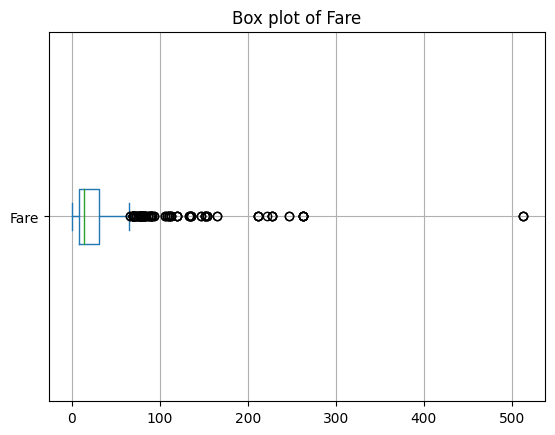

In [23]:
# Box plot of Fare
traindata['Fare'].plot(kind='box', title='Box plot of Fare', grid=True, vert = 0)

plt.show()

The max ticket price is just over $500. The fare price for most of the tickets are between 0 and 100.

In [24]:
# Number of unique names
print(traindata["Name"].nunique())

891


All the names of the passengers are unique so there is no sign of data falsification

In [25]:
traindata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


From the above observations, the titanic dataset seems to be faithful to the original source of data, which is primarily based on passenger manifests and other historical records, as there are no unrealistic or incorrect values.
However, there are some missing values mainly for the Cabin and Age column

### 2.3.4 Data representative and assumption

The data population is all the passengers on the titanic and the problem we want to solve is whether a passenger will survive or not. Since the dataset contains info about passengers on the titanic it is relevant to the problem we want to solve.

The assumption we are making is that the passenger info dataset has all the relevant info for making the prediction which might not be true. For e.g. there is no information about the general wellness of the passenger if they had any illness or health issues. Another assumption we are making is that all the passengers in this dataset actually ended up boarding the titanic, maybe there would be individuals in this dataset who didn't end up going.



### 2.3.5
The Titanic had a total of 1317 passengers, we have records of 1309 passengers. As our dataset is missing only 8 passengers from the data population we can infer that no sampling method has been used to create the dataset.

In [26]:
# calculate the percentage of males and females in training dataset
print(traindata['Sex'].value_counts()['male'] / len(traindata) * 100)
print(traindata['Sex'].value_counts()['female'] / len(traindata) * 100)

64.75869809203144
35.24130190796858


In [27]:
# calculate the percentage of women that survived
traindata.groupby(['Sex'])['Survived'].mean() * 100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

From a google search, we know that the 37% of passengers on the titanic were women, we also know that 73% of women survived the titanic disaster. Since our training dataset also closely resembles this number, we can infer that random sampling might have been used to split the dataset into training and test

**Submission**

In [28]:
!pip install nbconvert

In [30]:
%shell jupyter nbconvert --to html ProjectStage1.ipynb

[NbConvertApp] Converting notebook ProjectStage1.ipynb to html
[NbConvertApp] Writing 772838 bytes to ProjectStage1.html
